In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, auc, roc_auc_score, roc_curve
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LogisticRegression
sns.set()
%matplotlib inline

In [2]:
balabit_id = [7, 9, 12, 15, 16, 20, 21, 23, 29, 35]

### Loading data

In [3]:
df_balabit = pd.read_csv('balabit_features_training.csv').drop(['session', 'n_from', 'n_to'], axis=1)

In [4]:
df_balabit.shape

(60905, 40)

In [5]:
df_balabit

,type_of_action,traveled_distance_pixel,elapsed_time,direction_of_movement,straightness,num_points,sum_of_angles,mean_curv,sd_curv,max_curv,...,mean_a,sd_a,max_a,min_a,mean_jerk,sd_jerk,max_jerk,min_jerk,a_beg_time,class
0,3,1416.943891,5.273,2,0.187622,31,3.760324,-0.018307,0.506226,1.570796,...,714.235169,10738.565469,3.487634e+04,-22725.593000,5.646781e+02,1.505563e+05,3.711664e+05,-4.823568e+05,0.110,21
1,3,1829.669230,7.192,5,0.165234,30,-5.060793,-0.143820,1.091374,1.338233,...,420.468467,14270.213112,4.914334e+04,-33436.936910,3.916259e+03,2.160853e+05,4.977577e+05,-7.576172e+05,0.406,21
2,1,3685.057878,12.137,1,0.066772,27,1.914629,0.146974,0.668816,3.141593,...,127119.788964,673582.988149,3.427631e+06,-159661.434693,7.900143e+06,4.210661e+07,2.142292e+08,-1.045858e+07,0.218,21
3,3,67.639444,0.749,6,0.832658,8,-7.457742,-0.015183,0.157249,0.267838,...,94.493523,1250.874777,2.613453e+03,-1388.949946,9.225947e+02,1.553237e+04,2.375866e+04,-2.565643e+04,0.110,21
4,1,370.972219,7.909,0,0.820837,8,7.957125,0.065339,0.462525,0.909831,...,1430.166777,11520.673725,2.417342e+04,-15045.336530,-1.271497e+03,1.316836e+05,2.259902e+05,-2.293494e+05,0.686,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60900,4,49.133326,4.056,0,0.876116,17,6.549437,0.207869,0.809779,3.141593,...,16.240998,118.392380,2.525040e+02,-208.015193,-4.927349e+01,1.257817e+03,2.316550e+03,-2.854710e+03,0.109,16
60901,4,10.000000,5.102,0,0.200000,10,12.566371,0.392699,2.007874,3.141593,...,10.951303,19.223134,4.312775e+01,-7.618815,7.574564e+01,1.446507e+02,3.624755e+02,-4.909155e+01,0.921,16
60902,1,96.499400,2.215,3,0.891739,10,7.228497,0.513603,1.742025,4.712389,...,76.070701,835.887467,1.464577e+03,-1196.949902,1.377966e+02,9.908715e+03,1.727707e+04,-1.706107e+04,0.218,16
60903,4,54.000000,4.383,0,0.851852,17,6.283185,0.000000,1.187410,3.141593,...,10.657815,323.899435,1.094184e+03,-420.839997,3.262130e+01,4.461561e+03,9.266202e+03,-1.389930e+04,0.218,16


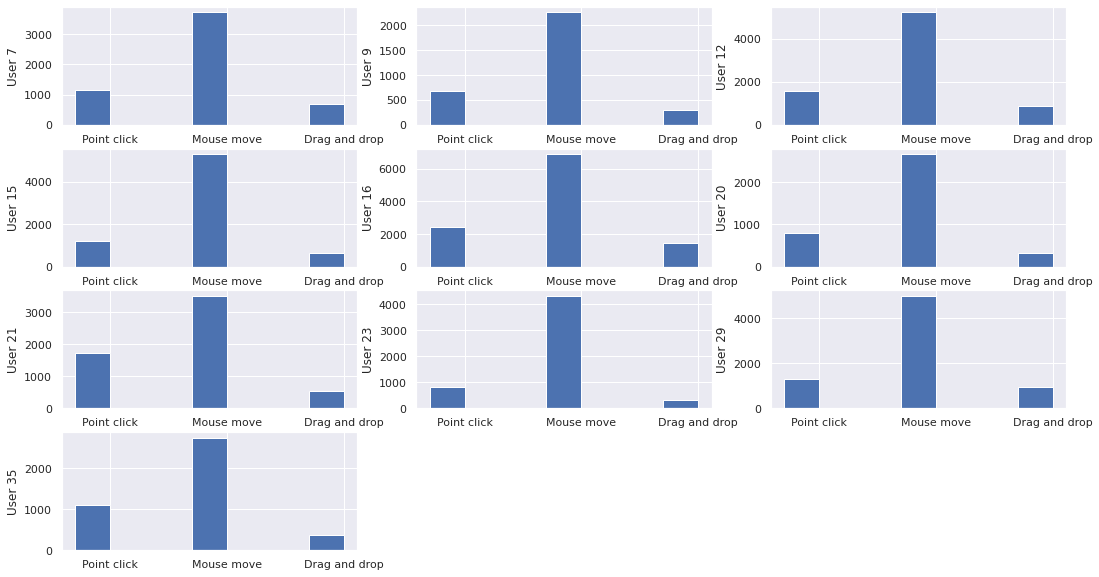

In [11]:
fig, axes = plt.subplots(4, 3, figsize=(18, 10))
x = np.arange(3)
plt.setp(axes, xticks=x)


width = 0.3
tmp = list(df_balabit.groupby('class')['type_of_action'].value_counts().sort_index().to_dict().values())
b, e = 0, 3

for i in range(4):
    for j in range(3): 
        try:
            axes[i, j].bar(x, tmp[b:e], width=-1.*width, align='edge')
            axes[i, j].set_xticks(x)
            axes[i, j].set_xticklabels(['Point click', 'Mouse move', 'Drag and drop'])
            axes[i, j].set_ylabel(f'User {balabit_id[i*3+j]}')
            b, e = e, e + 3
        except ValueError:
            fig.delaxes(axes[i, j])
            fig.delaxes(axes[i, j])
    
plt.show()

### Data preparation

In [ ]:
fpr, tpr, roc_auc = {}, {}, {}


### Building a simple model (Logistic regression)

In [ ]:
log_reg = LogisticRegression()